

# Project: Investigate a Dataset (European Soccer Database)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Q1:Data Wrangling</a></li>
<li><a href="#q1eda">Q1:Exploratory Data Analysis</a></li>
<li><a href="#q1conclusions">Q1:Conclusions</a></li>
<li><a href="#q2wrangling">Q2:Data Wrangling</a></li>
<li><a href="#q2eda">Q2:Exploratory Data Analysis</a></li>
<li><a href="#q2conclusions">Q2:Conclusions</a></li>
<li><a href="#list">List of Resources used</a></li>
</ul>

<a id='intro'></a>
## Introduction

The database I chose is the European Soccer Database. This database consists of a number of SQL tables, with keys connecting the various tables. Some tables, namely the player_attributes and the team_attributes get their content from a videogame (Fifa, by EA), the rest is taken from actual historical data about matches, bookmakers etc.

For this analysis we will use:

#### In question 1:
Historical data about players and "Fifa" data about players attributes

#### In question 2 :
Historical data about match scores for specific season and across different leagues and teams.

For clarity reasons, I will wrangle the data in two sections, one per question. Every section will aim to get the data clean and ready to answer the relative question.  


### Questions:
### Q1: How do age, weight and height of players relate to sprint speed (sprint_speed)?
### Q2: Which league sees the highest numbers of goals per game on average?  And how does the value change across seasons?


In [75]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

#magic word
% matplotlib inline

#importing packages
import numpy as np 
import pandas as pd 
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
##  Q1: Data Wrangling

Here I will load the data. The first step should be to join two tables: the Players and Player_attributes
### General Properties

In [76]:
# The DB is in SQL, this is one possible way to integrate it into the Notebook:
database = "/Users/marcodefalco/Downloads/Soccer_Project/database.sqlite"
conn = sqlite3.connect(database)
#Loading the data and connecting the data

player_attr = pd.read_sql("""SELECT date, sprint_speed, p.player_api_id, player_name, birthday, height, weight
                        FROM player_attributes pa JOIN
                        player p ON pa.player_api_id = p.player_api_id
                        ;""", conn)
player_attr.head(8)

,date,sprint_speed,player_api_id,player_name,birthday,height,weight
0,2016-02-18 00:00:00,64.0,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
1,2015-11-19 00:00:00,64.0,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
2,2015-09-21 00:00:00,64.0,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
3,2015-03-20 00:00:00,64.0,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
4,2007-02-22 00:00:00,64.0,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
5,2016-04-21 00:00:00,78.0,155782,Aaron Cresswell,1989-12-15 00:00:00,170.18,146
6,2016-04-07 00:00:00,78.0,155782,Aaron Cresswell,1989-12-15 00:00:00,170.18,146
7,2016-01-07 00:00:00,78.0,155782,Aaron Cresswell,1989-12-15 00:00:00,170.18,146


Column choice seems ok for our purposes. Afterall we need 'birthday' and 'date', to calculate age. we also fetched height, weight and, of course, sprint speed.
However, we can see a big problem with this data right away: we have more than one entry for every given player. This is probably due to multiple evaluations of players over time, which makes sense, as a player performance might change along their career.
Our goal should be to have one entry per player, so that we don't count them twice, and also have evaluations from the same year so that we can calculate age correctly.

In [77]:
#Limiting the data fetched to 2015:
player_attr_2015 = pd.read_sql("""SELECT date, sprint_speed, p.player_api_id, player_name, birthday, height, weight
                        FROM player_attributes pa JOIN
                        player p ON pa.player_api_id = p.player_api_id
                        WHERE date BETWEEN '2015-01-01 00:00:00' AND '2015-12-31 23:59:59' ;""", conn)
player_attr_2015.head(20)

,date,sprint_speed,player_api_id,player_name,birthday,height,weight
0,2015-11-19 00:00:00,64.0,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
1,2015-09-21 00:00:00,64.0,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
2,2015-03-20 00:00:00,64.0,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
3,2015-12-24 00:00:00,78.0,155782,Aaron Cresswell,1989-12-15 00:00:00,170.18,146
4,2015-12-17 00:00:00,78.0,155782,Aaron Cresswell,1989-12-15 00:00:00,170.18,146
5,2015-10-16 00:00:00,78.0,155782,Aaron Cresswell,1989-12-15 00:00:00,170.18,146
6,2015-09-25 00:00:00,78.0,155782,Aaron Cresswell,1989-12-15 00:00:00,170.18,146
7,2015-09-21 00:00:00,78.0,155782,Aaron Cresswell,1989-12-15 00:00:00,170.18,146
8,2015-01-09 00:00:00,82.0,155782,Aaron Cresswell,1989-12-15 00:00:00,170.18,146
9,2015-10-09 00:00:00,75.0,162549,Aaron Doran,1991-05-13 00:00:00,170.18,163


We still have more than one evaluation per player per year. However, from the first 20 columns of the database we see a pattern: the evaluations are chronologically ordered, the latest ones appearing first. Therefore, I will drop the duplicate rows based on duplicate player IDs and see what happens.

In [78]:
#unique rows of players
un_player_attr_2015 = player_attr_2015.drop_duplicates(subset = 'player_api_id')
un_player_attr_2015 = un_player_attr_2015.reset_index()
un_player_attr_2015.head(10)

,index,date,sprint_speed,player_api_id,player_name,birthday,height,weight
0,0,2015-11-19 00:00:00,64.0,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
1,3,2015-12-24 00:00:00,78.0,155782,Aaron Cresswell,1989-12-15 00:00:00,170.18,146
2,9,2015-10-09 00:00:00,75.0,162549,Aaron Doran,1991-05-13 00:00:00,170.18,163
3,11,2015-10-16 00:00:00,34.0,30572,Aaron Galindo,1982-05-08 00:00:00,182.88,198
4,17,2015-12-24 00:00:00,31.0,23780,Aaron Hughes,1979-11-08 00:00:00,182.88,154
5,22,2015-09-25 00:00:00,69.0,27316,Aaron Hunt,1986-09-04 00:00:00,182.88,161
6,27,2015-12-17 00:00:00,67.0,564793,Aaron Kuhl,1996-01-30 00:00:00,172.72,146
7,29,2015-10-16 00:00:00,89.0,30895,Aaron Lennon,1987-04-16 00:00:00,165.10,139
8,35,2015-12-03 00:00:00,77.0,101042,Aaron Meijers,1987-10-28 00:00:00,175.26,170
9,39,2015-12-24 00:00:00,71.0,231592,Aaron Mooy,1990-09-15 00:00:00,175.26,150


It seems now that I have only one evaluation per player and that all the evaluations belong to the same time period, the second half of 2015.

In [79]:
#Let's check if we have missing data and if every row is unique
un_player_attr_2015.info()
un_player_attr_2015.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7502 entries, 0 to 7501
Data columns (total 8 columns):
index            7502 non-null int64
date             7502 non-null object
sprint_speed     7502 non-null float64
player_api_id    7502 non-null int64
player_name      7502 non-null object
birthday         7502 non-null object
height           7502 non-null float64
weight           7502 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 469.0+ KB


index            7502
date               52
sprint_speed       81
player_api_id    7502
player_name      7414
birthday         4314
height             19
weight             47
dtype: int64

Now the data looks much better. We can see that every row is complete (no missing values) and that there are as many unique players (player_api_id) as rows. Moreover, the evaluations of the attributes shown, occurred all around the same time (second half of 2015), which in turn will allow us to calculate the age of the players fairly.

In [91]:
#Let's turn to data preparation. We shall now calculate the age of the players
# ..It wasn't without sorrow that I learned that dates are strings, which are hard to work with. 
# We need to convert them to datetime..
birthday = un_player_attr_2015['birthday'].astype('datetime64[ns]')
measurment_date = un_player_attr_2015['date'].astype('datetime64[ns]')
#.. and finally calculate the age.
p_age = (measurment_date - birthday).astype('timedelta64[D]')/365.25 
#I could have used [Y] in order to get the data in years directly. However, it would outomatically truncate the decimals
# So in order not to lose accuracy I leave it in days and then divide.
un_player_attr_2015['age'] = p_age
un_player_attr_2015.head(21)

,index,date,sprint_speed,player_api_id,player_name,birthday,height,weight,age
0,0,2015-11-19 00:00:00,64.0,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,23.720739
1,3,2015-12-24 00:00:00,78.0,155782,Aaron Cresswell,1989-12-15 00:00:00,170.18,146,26.023272
2,9,2015-10-09 00:00:00,75.0,162549,Aaron Doran,1991-05-13 00:00:00,170.18,163,24.407940
3,11,2015-10-16 00:00:00,34.0,30572,Aaron Galindo,1982-05-08 00:00:00,182.88,198,33.440110
4,17,2015-12-24 00:00:00,31.0,23780,Aaron Hughes,1979-11-08 00:00:00,182.88,154,36.125941
5,22,2015-09-25 00:00:00,69.0,27316,Aaron Hunt,1986-09-04 00:00:00,182.88,161,29.056810
6,27,2015-12-17 00:00:00,67.0,564793,Aaron Kuhl,1996-01-30 00:00:00,172.72,146,19.879535
7,29,2015-10-16 00:00:00,89.0,30895,Aaron Lennon,1987-04-16 00:00:00,165.10,139,28.501027
8,35,2015-12-03 00:00:00,77.0,101042,Aaron Meijers,1987-10-28 00:00:00,175.26,170,28.098563
9,39,2015-12-24 00:00:00,71.0,231592,Aaron Mooy,1990-09-15 00:00:00,175.26,150,25.273101


End of data preparation. We went through a cleaning phase and lastly we calculated a new field.

<a id='q1eda'></a>
## Q1: Exploratory Data Analysis
Now that we are done with the data prep, we can start with the first explorations. A good idea in my opinion is to see the distribution of each of the variable I want to examine. Although the data cleaning phase is complete, this process will help me spot anomalies in the data.

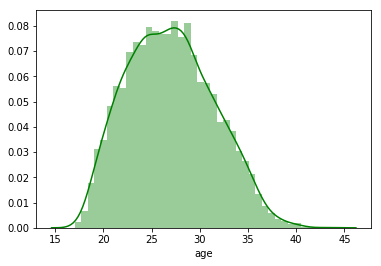

In [81]:
sns.distplot(un_player_attr_2015['age'], hist = True, color="g")

Fortunately, there are not visible anomalies in this vizualization. I am happy to see that the calculation of this field workwe out well. The distribution of the age is how we would expect it: very slightly skewed to the right (positive skewness), as there are very few players, usually goalies, who decide to keep playing well into their forties.

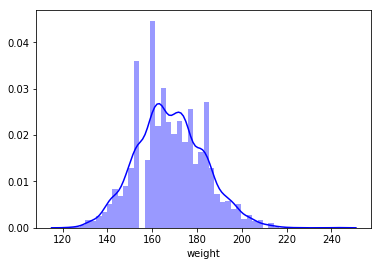

In [82]:
sns.distplot(un_player_attr_2015['weight'], hist = True, color="b")

Here things are different. Weight data is not continous. It is in fact discrete. After a bit of thinkering around as well as some reading, I realized that histograms of discrete values can create problems. In fact, when you have discrete variables the choice of the bins is not trivial. If you have, say 5 bins and 6 unique values in that field, one of the bins will have twice as many as the other. This *might* be the problem here.

It would be advisable to check if I have data in the 154-158 spectrum.

In [128]:
print(np.sort(un_player_attr_2015['weight'].unique()))


[123 126 128 130 132 134 137 139 141 143 146 148 150 152 154 157 159 161
 163 165 168 170 172 174 176 179 181 183 185 187 190 192 194 196 198 201
 203 205 207 209 212 214 216 218 220 225 243]


There are indeed values in that range. Therefore, I must change the figure chosen, opting for a bar chart.

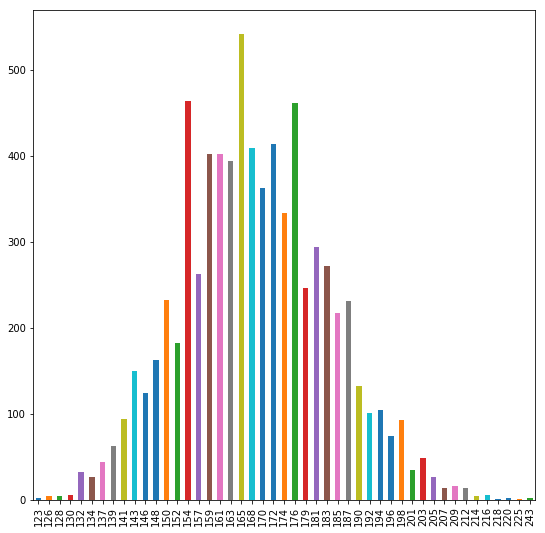

In [125]:

vc_w = un_player_attr_2015['weight'].value_counts().sort_index()
ax_w = vc_w.plot(kind='bar', figsize = (9,9))
fig = ax_w.get_figure()
#fig.autofmt_xdate()

This looks much better already and it still gives us a good grasp on how values are distributed.

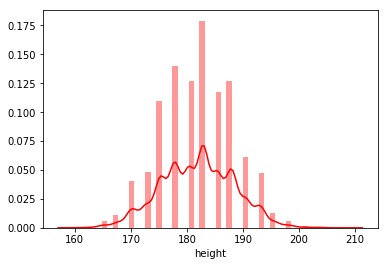

In [21]:
sns.distplot(un_player_attr_2015['height'], hist = True, color = 'r' )

This figure makes me question the nature of the height data. The height data is continous only in appeareance. The reality is that it is actually discrete. My guess is that it has decimal values only because it was converted from imperial to metric. Hence, we use a bar plot again.

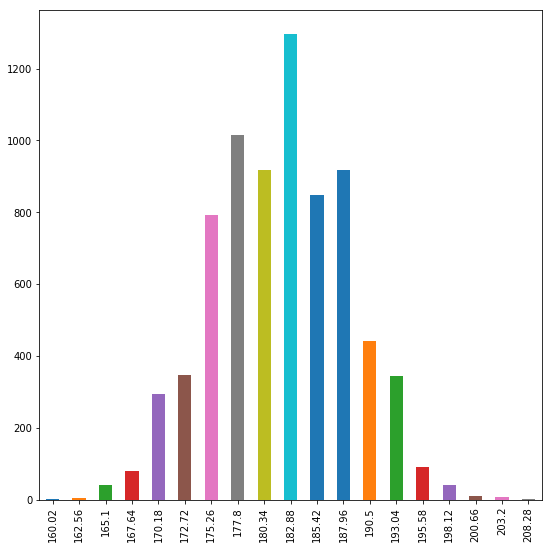

In [126]:
vc_h = un_player_attr_2015['height'].value_counts().sort_index()
ax_h = vc_h.plot(kind='bar', figsize = (9,9))
fig = ax_h.get_figure()

We will see how the discreteness of these values will affect our visualizations once we will plot this data against 'sprint_speed'.

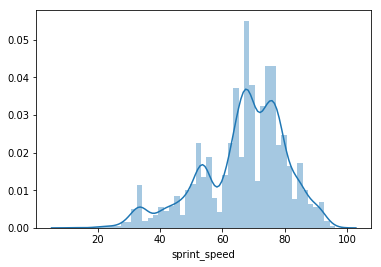

In [13]:
sns.distplot(un_player_attr_2015['sprint_speed'], hist = True)

Our dependent variable looks negatively skewed. What surprises me is that this data comes from a game, which makes it somehow "arbitrarily chosen", yet the game manufacturers did not define a mode nor a mean around 50 but higher values for both.

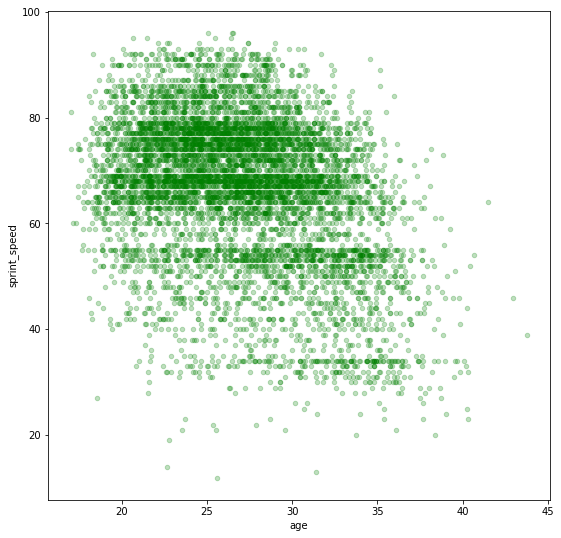

In [8]:
un_player_attr_2015.plot(kind='scatter',x='age',y='sprint_speed', figsize=(9,9),color = 'green', alpha=0.25)
#setting the opacity here was very useful: with solid colors we wouldn't have seen where the data clusters
plt.show(un_player_attr_2015)

Now for the other two plots: weight and height.

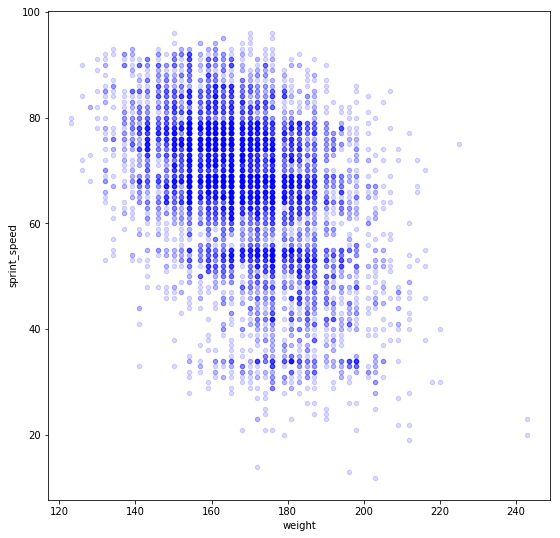

In [9]:
un_player_attr_2015.plot(kind='scatter',x='weight',y='sprint_speed', figsize=(9,9),color = 'blue', alpha=0.15)
plt.show()

In the last and the following visualizations (weight against sprint_speed, height against sprint_speed), we see that all the datapoints seem piled up in organized columns. This is due to the descreteness of the values of height and weight as discussed above.

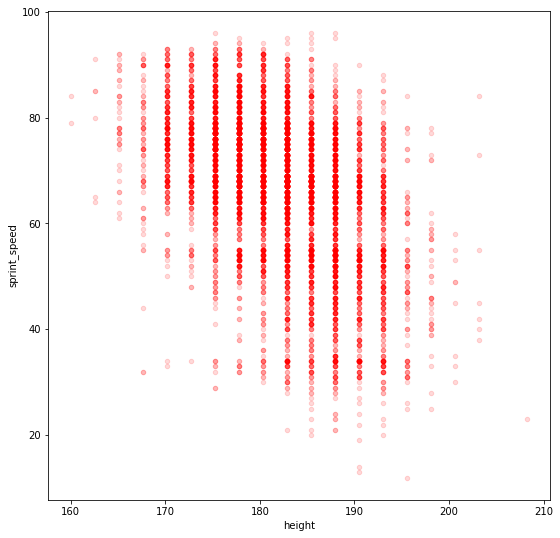

In [16]:
un_player_attr_2015.height.astype(float)
un_player_attr_2015.plot(kind='scatter',x='height',y='sprint_speed', figsize=(9,9),color = 'red', alpha=0.15)
plt.show()

For a number of reasons, tt does not make much sense to plot multiple independent variables on the same figure in this case, (for one each of them is measured in different units). I show this idea below:

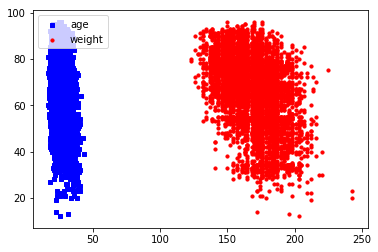

In [127]:
fig_m = plt.figure()
ax1 = fig_m.add_subplot(111)

ax1.scatter(un_player_attr_2015['age'], un_player_attr_2015['sprint_speed'], s=10, c='b', marker="s", label='age')
ax1.scatter(un_player_attr_2015['weight'],un_player_attr_2015['sprint_speed'], s=10, c='r', marker="o", label='weight')
plt.legend(loc='upper left');
plt.show()

<a id='q1conclusions'></a>

However, An idea to expand on this topic, could be to do a PCA to aggregate the values of height, weight and age in a single calculated field and look again for correlation.

## Q1: Conclusion
From all the three graphs above we notice a negative correlation between the x and y variables. It would be interesting now to understand the strength of this correlation by fitting a line through the data and calculating the r squared. Given the spread of the data in the plot, I don't expect a particularly strong correlation.

However, I believe it was very important to reduce the opacity of the single datapoint on the figure as it allows as to see the true distribution of the data.

**Limitations of the analysis:**
In the second part we have plotted three different variables against the dependent variable sprint_speed. Although we *could* infer that age, height and weight affect the sprint speed of a player we must keep in mind the following:
- No statistical test was run. For instance, we do not have calculated a p-value, which could have given us the statistical significance of this correlation.
- As mentioned, no calculation of r squared has been provided, therefore we have no precise idea of the strength of the correlation.
- As a generale rule, we know that correlation does not imply causation. For instance, it could be that age does not affect sprint speed per se but rather, players engage in specific trainings focused on speed during the earlier phases of their career.
- There are other variables that could have been useful in the analysis that we did not take in consideration: one example is the "acceleration" and "stamina" attributes.

<a id='q2wrangling'></a>

##  Q2: Data Wrangling

Below I will load the data. The first step should be to join two tables: league and match as the name of the leagues are not present in the match table.

In [11]:
match_league = pd.read_sql("""SELECT season, home_team_goal, away_team_goal, name, match_api_id 
                        FROM match m JOIN league l on m.league_id = l.id;""", conn)
match_league.head()

,season,home_team_goal,away_team_goal,name,match_api_id
0,2008/2009,1,1,Belgium Jupiler League,492473
1,2008/2009,0,0,Belgium Jupiler League,492474
2,2008/2009,0,3,Belgium Jupiler League,492475
3,2008/2009,5,0,Belgium Jupiler League,492476
4,2008/2009,1,3,Belgium Jupiler League,492477


The only reason why I need the match_api_id column as well, is to check if there are duplicate rows or duplicate matches present.  In that case, I'll have to discard them.

In [12]:
match_league.info()
match_league.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 5 columns):
season            25979 non-null object
home_team_goal    25979 non-null int64
away_team_goal    25979 non-null int64
name              25979 non-null object
match_api_id      25979 non-null int64
dtypes: int64(3), object(2)
memory usage: 1014.9+ KB


season                8
home_team_goal       11
away_team_goal       10
name                 11
match_api_id      25979
dtype: int64

Perfect. no empty cells and all the matches are unique.

In [27]:
#Let's calculate the total goals scored in every match
match_league['total_goals'] = match_league['away_team_goal'] + match_league['home_team_goal']
#Is there a better way to do this (maybe vectorized?) ? is my way still acceptable?
match_league.head()

,season,home_team_goal,away_team_goal,name,match_api_id,total_goals
0,2008/2009,1,1,Belgium Jupiler League,492473,2
1,2008/2009,0,0,Belgium Jupiler League,492474,0
2,2008/2009,0,3,Belgium Jupiler League,492475,3
3,2008/2009,5,0,Belgium Jupiler League,492476,5
4,2008/2009,1,3,Belgium Jupiler League,492477,4


<a id='q2eda'></a>

## Q2: Exploratory Data Analysis
Now I will start by calculating the average total goals scored per season, per league. Therefore I should start by grouping by name and season.

In [14]:
grouped_n_s = match_league.groupby(['name','season'])
#first I group by league name and season
#Next, I should aggregate the data in 'total_goals' calculating the mean.

#Just to be clear, were I in SQL, the query would have been: 
# SELECT name, season, AVG(total_goals) FROM grouped_n_s GROUP BY name, season;

mean_grouped = grouped_n_s['total_goals'].agg(np.mean)
mean_grouped

name                      season   
Belgium Jupiler League    2008/2009    2.794118
                          2009/2010    2.690476
                          2010/2011    2.645833
                          2011/2012    2.879167
                          2012/2013    2.929167
                          2013/2014    2.500000
                          2014/2015    2.783333
                          2015/2016    2.891667
England Premier League    2008/2009    2.478947
                          2009/2010    2.771053
                          2010/2011    2.797368
                          2011/2012    2.805263
                          2012/2013    2.797368
                          2013/2014    2.768421
                          2014/2015    2.565789
                          2015/2016    2.700000
France Ligue 1            2008/2009    2.257895
                          2009/2010    2.410526
                          2010/2011    2.342105
                          2011/2012    2.515789
    

The problem with this data now, is that it's in a Series form, it's no longer a Dataframe. I will have to bring it back to a df form now. I sense there might be a more efficient way to proceed through this phase, but I am not aware of it as of now.


In [15]:
df_l_s_g = mean_grouped.to_frame().reset_index()
df_l_s_g.head()

,name,season,total_goals
0,Belgium Jupiler League,2008/2009,2.794118
1,Belgium Jupiler League,2009/2010,2.690476
2,Belgium Jupiler League,2010/2011,2.645833
3,Belgium Jupiler League,2011/2012,2.879167
4,Belgium Jupiler League,2012/2013,2.929167


Now it's time to vizualize the data. An histogram or scatter plot would not be the best choice in my opinion. Here we need a figure that shows how the average total goals changed over time as trendlines might emerge. Therefore, a line plot appears to be the best choice.

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


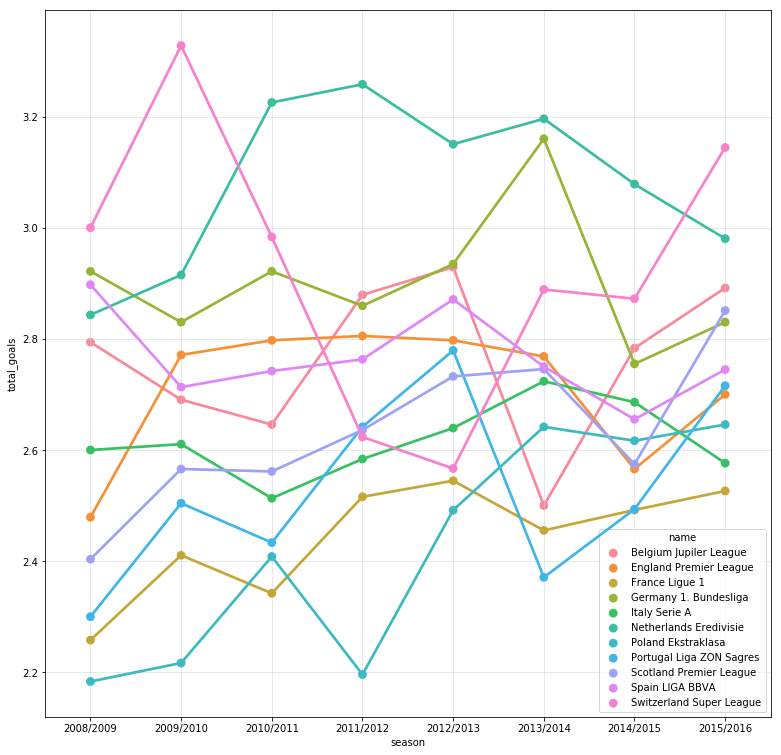

In [16]:
plt.figure(figsize=(13,13))
ax = sns.pointplot(x='season', y='total_goals', hue='name',data=df_l_s_g)
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=0.5)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.show()

#Again I get a warning but I don't understand what I am doing wrong. Why the Warning?

If the graph is too crowded, I can narrow down the leagues I want to compare.

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


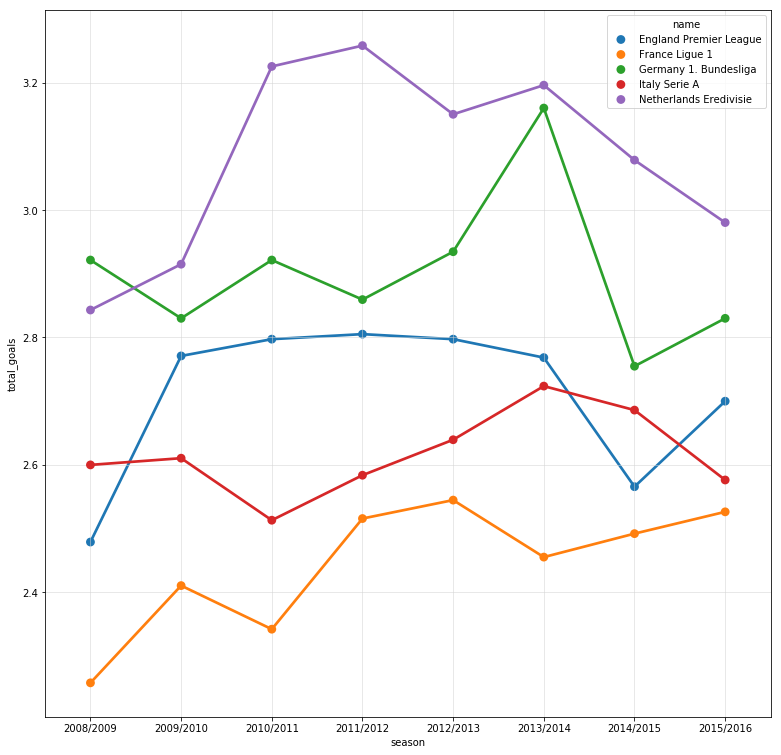

In [22]:
league_list = ['Netherlands Eredivisie', 'England Premier League', 'France Ligue 1', 'Germany 1. Bundesliga', 'Italy Serie A']
selected = df_l_s_g[df_l_s_g.name.isin(league_list)]

plt.figure(figsize=(13,13))
ax = sns.pointplot(x='season', y='total_goals', hue='name',data=selected)
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=0.5)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.show()

<a id='q2conclusions'></a>

## Q2: Conclusions

It is interesting to see that on average the dutch soccer has bean quite consistent in having more goals per game than the others. Some leagues, such as the swiss one, see a lot of variance overtime, with two peaks above all other leagues and a big valley. In other cases, such as the italian one, there is consistency along the years around the same number of goals scored per game.

**Limitation of the analysis**
- Although we have seen that the dutch soccer has on average more goals scored per game per season, we cannot infer anything about the statistical significance of this phenomenon. In other words, without a p-value, we cannot say if this phenomenon was attributable to chance.
- The seasons available were limited. Specifically, we had only 8 seasons to analyze, which is not sufficient to mark reliable trendlines, especially as some leagues showed a lot of volatility.
- In general, in case we wanted to infer something about the future, or about the "typical" scoring pattern within a league, we would need to run statistical tests.

<a id='list'></a>
## List of Resources used
### Stack overflow
I have used this forum every time I was in trouble, they should have called it "STUCK" Overflow really.

Ex multis:
<li>https://stackoverflow.com/questions/23619989/delete-cell-ipython-2-0 </li>
<li>https://stackoverflow.com/questions/37912487/pandas-subset-and-drop-rows-based-on-column-value</li>
<li>https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value</li>
<li>https://stackoverflow.com/questions/37859151/when-subtracting-date-columns-in-pandas-and-dividing-the-result-by-np-timedelta6</li>
..and many others.
### Kaggle
In particular this one, to import SQL in the notebook:
https://www.kaggle.com/dimarudov/data-analysis-using-sql

### Pandas documentation
https://pandas.pydata.org/pandas-docs/stable/index.html

Extensively, probably my primary reference for the project.